#**Install Library**

In [202]:
!pip install imbalanced-learn
!pip install sastrawi

#Import Library

In [203]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import re
import string
import requests
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from io import StringIO

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Memuat Dataset

In [204]:
# Memuat dataset
reviews_df = pd.read_csv("https://raw.githubusercontent.com/oktaagnes/ML_Analisis_Sentimen/refs/heads/main/review_shopeepay.csv")

In [205]:
# Menampilkan informasi dasar dataset
print("Jumlah baris dan kolom:")
print(reviews_df.shape)

Jumlah baris dan kolom:
(11999, 1)


In [206]:
# Menampilkan tipe data dari setiap kolom
print("\nInformasi kolom:")
print(reviews_df.info())


Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                     --------------  ---

In [207]:
# Menampilkan 5 baris pertama dataset
print("\n5 baris pertama dataset:")
print(reviews_df.head())


5 baris pertama dataset:
                                                                    Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....
0                                                                                                                                                                                                                                                                                          QRIS nya cepet banget. Tolong itu Bug yang penutup saldo diperbaiki, setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup.
1    Aplikasi yang

In [208]:
reviews_df.dtypes

,0
Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....,object


In [209]:
df = pd.read_csv("https://github.com/oktaagnes/ML_Analisis_Sentimen/blob/main/review_shopeepay.csv?raw=true", header=None, names=["Review"])
df

,Review
0,Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....
1,"QRIS nya cepet banget. Tolong itu Bug yang penutup saldo diperbaiki, setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup."
2,"Aplikasi yang bagus untuk pengiriman sesama dan antar bank, aplikasi yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau bayar tagihan dengan praktis, hal yang suka dari apps ini adalah QRIS karena transaksi jadi lebih mudah dan cepat, mungkin hanya itu sedikit kekuranganya menurut saya pribadi, untuk aplikasinya sangat stabil digunakan dan ramah penyimpanan, untuk pelayanannya sangat ramah dan terpecaya"
3,"Saya tidak menemukan esensi kegunaan lain dari aplikasi ini selain sebagai tempat setor awal untuk menabung di seabank saat hanya tersedia jaringan ritel alfa di daerah, selebihnya tidak berguna, pembayaran produk digital juga sudah disatukan dengan shopee, sebagai motode pembayaran shopee pun sudah tidak menarik karena biaya admin yang di kenakan sudah sama besar dengan metode lain di luar ekosistem shopee. Sebaiknya lebur saja dengan tabungan seperti ewallet si hijau."
4,"Aplikasi yang keren untuk pengiriman sesama dan antar bank, shope pay yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau bayar tagihan dengan praktis, hal yang suka dari apps ini adalah QRIS karena transaksi jadi lebih gampang dan cepat, mungkin hanya itu sedikit kekuranganya menurut saya pribadi, untuk appsnya sangat stabil dipakaidan ramah penyimpanan, untuk pelayanannya sangat ramah dan terpecaya deh"
...,...
11995,Untuk blanja baik klu untuk spinjam saya blum prnah d kasih smoga k dpanya lbih baik
11996,Mudah pembayaran nya gak perlu repot
11997,Tolong proses pinjamannya lebih mudah di ACC dan cepat
11998,sangat membantu sekali dalam segala keperluan terimakasih shopee


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  12000 non-null  object
dtypes: object(1)
memory usage: 93.9+ KB


#Data Preprocessing

####Cek Data Missing

In [211]:
# Menangani data yang hilang
df= df.dropna()
print(df.isnull().sum())

Review    0
dtype: int64


#### Data Cleaning

In [212]:
df = df.drop_duplicates()
print (df)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review
0                                                                       Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....
1                                   

Melihat info df, terdapat perubahan jumlah data pada df setelah dilakukan pembersihan

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11283 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  11283 non-null  object
dtypes: object(1)
memory usage: 176.3+ KB


####**Data**-processing text: membuat beberapa fungsi untuk memfilter teks

In [214]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','ya','ia','gak','ga','gaa','nya','na','sih','ku',"di","ya","loh","kah","kh","woi","woii","woy", "wkwk"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

####Tokenization: membuat kata baku atau pembenaran dari slangwords (bahasa gaul)

In [215]:
slangwords = {
    "@": "di", "abis": "habis", "TF":"Transfer","masi": "masih", "bgt": "banget","bner":"bener","maks": "maksimal", "plisss": "tolong", "indo": "indonesia", "ad": "ada", "plis": "tolong", "pls": "tolong", "cod": "bayar di tempat",
    "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ak": "saya", "alay": "norak", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar",
    "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "ato": "atau", "au ah": "tidak mau tahu", "ay": "sayang", "ayank": "sayang", "bakalan": "akan", "bandes": "bantuan desa",
    "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bentar": "sebentar", "beresin": "membereskan", "bete": "bosan", "bg": "abang", "bgmn": "bagaimana",
    "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bnr":"benar","knp": "kenapa",
    "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "bw": "bawa", "bwt": "buat", "byk": "banyak",
    "cengengesan": "tertawa", "cepet": "cepat", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cpe": "capek", "d": "di", "dah": "deh", "dapet": "dapat", "dek": "adik", "demen": "suka",
    "dgn": "dengan", "dimintak": "diminta","disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "dongs": "dong", "dpt": "dapat", "dri": "dari",
    "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "emng": "memang", "endak": "tidak", "enggak": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gaptek": "gagap teknologi",
    "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gile": "gila", "gimana": "bagaimana", "gj": "tidak jelas", "gmana": "bagaimana", "goblok": "bodoh", "gpny": "tidak punya",
    "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "haha": "tertawa", "hlm": "halaman", "hny": "hanya", "hr": "hari", "hrus": "harus", "huff": "mengeluh", "ilang": "hilang", "iye": "iya", "ja": "saja", "jadiin": "jadi",
    "jdi": "jadi", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kalo": "kalau", "kampret": "sialan", "kanwil": "kantor wilayah", "karna": "karena", "kbr": "kabar", "kdu": "harus",
    "kec": "kecamatan", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "ketrima": "diterima", "kl": "kalau", "klw": "kalau", "km": "kamu", "kmrn": "kemarin", "krm": "kirim", "ktmu": "ketemu", "ktr": "kantor", "kyk": "seperti",
    "la": "lah", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "lp": "lupa", "org": "orang", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "macem": "macam", "macih": "masih",
    "magabut": "makan gaji buta", "maksain": "memaksa", "mepet": "dekat sekali", "mgu": "minggu", "problem": "masalah", "tahi": "kotoran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "makasi": "terima kasih", "mnolak": "tolak",
    "trending": "trend", "min": "admin", "wkwkkw": "tertawa", "benarjujur": "jujur", "mgkin": "mungkin", "app": "aplikasi","apk":"aplikasi", "sy":"saya", "sat set": "cepat", "kls": "kelas", "gk": "tidak", "yg":"yang","ga":"tidak", "josssss":"bagus", "sya":"saya","stgh":"setengah","Mantab":"bagus"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

mengecek kolom kembali

In [216]:
print(df.columns)

Index(['Review'], dtype='object')


In [217]:
df.head()

,Review
0,Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....
1,"QRIS nya cepet banget. Tolong itu Bug yang penutup saldo diperbaiki, setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup."
2,"Aplikasi yang bagus untuk pengiriman sesama dan antar bank, aplikasi yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau bayar tagihan dengan praktis, hal yang suka dari apps ini adalah QRIS karena transaksi jadi lebih mudah dan cepat, mungkin hanya itu sedikit kekuranganya menurut saya pribadi, untuk aplikasinya sangat stabil digunakan dan ramah penyimpanan, untuk pelayanannya sangat ramah dan terpecaya"
3,"Saya tidak menemukan esensi kegunaan lain dari aplikasi ini selain sebagai tempat setor awal untuk menabung di seabank saat hanya tersedia jaringan ritel alfa di daerah, selebihnya tidak berguna, pembayaran produk digital juga sudah disatukan dengan shopee, sebagai motode pembayaran shopee pun sudah tidak menarik karena biaya admin yang di kenakan sudah sama besar dengan metode lain di luar ekosistem shopee. Sebaiknya lebur saja dengan tabungan seperti ewallet si hijau."
4,"Aplikasi yang keren untuk pengiriman sesama dan antar bank, shope pay yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau bayar tagihan dengan praktis, hal yang suka dari apps ini adalah QRIS karena transaksi jadi lebih gampang dan cepat, mungkin hanya itu sedikit kekuranganya menurut saya pribadi, untuk appsnya sangat stabil dipakaidan ramah penyimpanan, untuk pelayanannya sangat ramah dan terpecaya deh"


In [218]:
df['text_clean'] = df['Review'].apply(cleaningText)

df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [219]:
df

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....,Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimitedini baru aplikasi yg saya ingin kan sangat membantu sekali dan mudah cara pakainyajosssss bangetayo semua download aplikasinya sya sudah menggunakan hampir stgh tahuntdk ada kendala sama sekalitidak pernah maintenancedan selalu succes proses TF nya dengan cepat kilattanpa delayterima kasih shopee pay,mantab bner nih aplikasinya tf ke semua bank gratisnya unlimitedini baru aplikasi yg saya ingin kan sangat membantu sekali dan mudah cara pakainyajosssss bangetayo semua download aplikasinya sya sudah menggunakan hampir stgh tahuntdk ada kendala sama sekalitidak pernah maintenancedan selalu succes proses tf nya dengan cepat kilattanpa delayterima kasih shopee pay,mantab bener nih aplikasinya tf ke semua bank gratisnya unlimitedini baru aplikasi yang saya ingin kan sangat membantu sekali dan mudah cara pakainyajosssss bangetayo semua download aplikasinya saya sudah menggunakan hampir setengah tahuntdk ada kendala sama sekalitidak pernah maintenancedan selalu succes proses tf nya dengan cepat kilattanpa delayterima kasih shopee pay,"[mantab, bener, nih, aplikasinya, tf, ke, semua, bank, gratisnya, unlimitedini, baru, aplikasi, yang, saya, ingin, kan, sangat, membantu, sekali, dan, mudah, cara, pakainyajosssss, bangetayo, semua, download, aplikasinya, saya, sudah, menggunakan, hampir, setengah, tahuntdk, ada, kendala, sama, sekalitidak, pernah, maintenancedan, selalu, succes, proses, tf, nya, dengan, cepat, kilattanpa, delayterima, kasih, shopee, pay]","[mantab, bener, nih, aplikasinya, tf, bank, gratisnya, unlimitedini, aplikasi, membantu, mudah, pakainyajosssss, bangetayo, download, aplikasinya, tahuntdk, kendala, sekalitidak, maintenancedan, succes, proses, tf, cepat, kilattanpa, delayterima, kasih, shopee, pay]",mantab bener nih aplikasinya tf bank gratisnya unlimitedini aplikasi membantu mudah pakainyajosssss bangetayo download aplikasinya tahuntdk kendala sekalitidak maintenancedan succes proses tf cepat kilattanpa delayterima kasih shopee pay
1,"QRIS nya cepet banget. Tolong itu Bug yang penutup saldo diperbaiki, setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup.",QRIS nya cepet banget Tolong itu Bug yang penutup saldo diperbaiki setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup,qris nya cepet banget tolong itu bug yang penutup saldo diperbaiki setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup,qris nya cepat banget tolong itu bug yang penutup saldo diperbaiki setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup,"[qris, nya, cepat, banget, tolong, itu, bug, yang, penutup, saldo, diperbaiki, setiap, saldo, nya, disembunyikan, begitu, keluar, dari, aplikasi, dan, masuk, lagi, malah, keliatan, lagi, saldo, nya, padahal, udah, ditutup]","[qris, cepat, banget, tolong, bug, penutup, saldo, diperbaiki, saldo, disembunyikan, aplikasi, masuk, keliatan, saldo, udah, ditutup]",qris cepat banget tolong bug penutup saldo diperbaiki saldo disembunyikan aplikasi masuk keliatan saldo udah ditutup
2,"Aplikasi yang bagus untuk pengiriman sesama dan antar bank, aplikasi yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau baya

##Labeling Sentimen

In [220]:
# Menentukan label sentimen
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/oktaagnes/ML_Analisis_Sentimen/refs/heads/main/data/positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")


lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/oktaagnes/ML_Analisis_Sentimen/refs/heads/main/data/negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")


#### Pelabelan: Membuat fungsi untuk menentukan skor dalam kata positif, negatif, dan netral sesuai kamus yang sudah didapat

In [221]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
      polarity = 'positive'
    elif (score < 0):
      polarity = 'negative'
    else:
      polarity = 'neutral'

    return score, polarity

#### Pelabelan: Hasil dari pelabelan

In [222]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    5451
negative    4328
neutral     1504
Name: count, dtype: int64


##Visualisasi

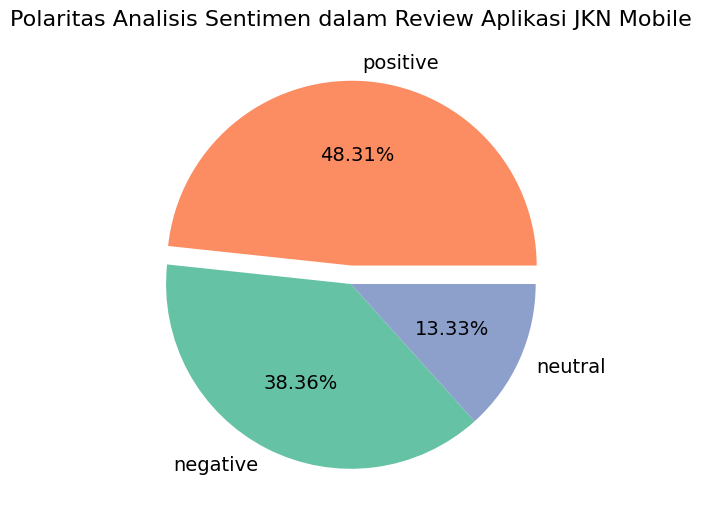

In [223]:
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = [0.1 if label == 'positive' else 0 for label in labels]
colors = ['#FC8D62', '#66C2A5', '#8DA0CB']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x=sizes, labels=labels, autopct='%1.2f%%', explode=explode, textprops={'fontsize': 14}, colors=colors)

ax.set_title('Polaritas Analisis Sentimen dalam Review Aplikasi JKN Mobile', fontsize=16, pad=20)
plt.show()

####Membuat tweets positif dan negatif untuk visulisasi

In [224]:
pd.set_option('display.max_colwidth', 3500)

positive_tweets = df[df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [225]:
pd.set_option('display.max_colwidth', 3500)

negative_tweets = df[df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets[0:10]
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [226]:
pd.set_option('display.max_colwidth', 3500)

negative_tweets = df[df['polarity'] == 'neutral']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets[0:10]
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

####Memvisualisasi: wordcloud kata positif dan negatif

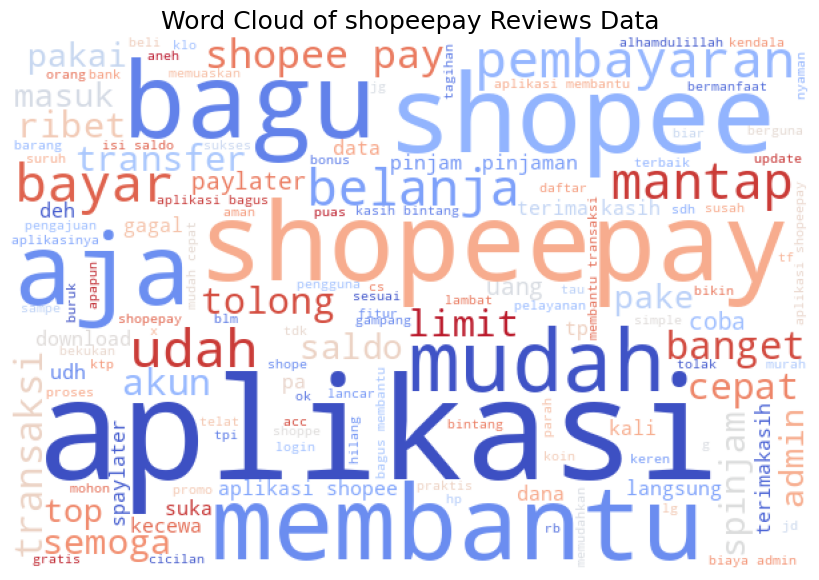

In [227]:
list_words = ''

for tweet in df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10,
    colormap='coolwarm'
).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of shopeepay Reviews Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
ax.axis('off')

fig.tight_layout(pad=0)
plt.show()

####Memvisualisasi: wordcloud kata negatif

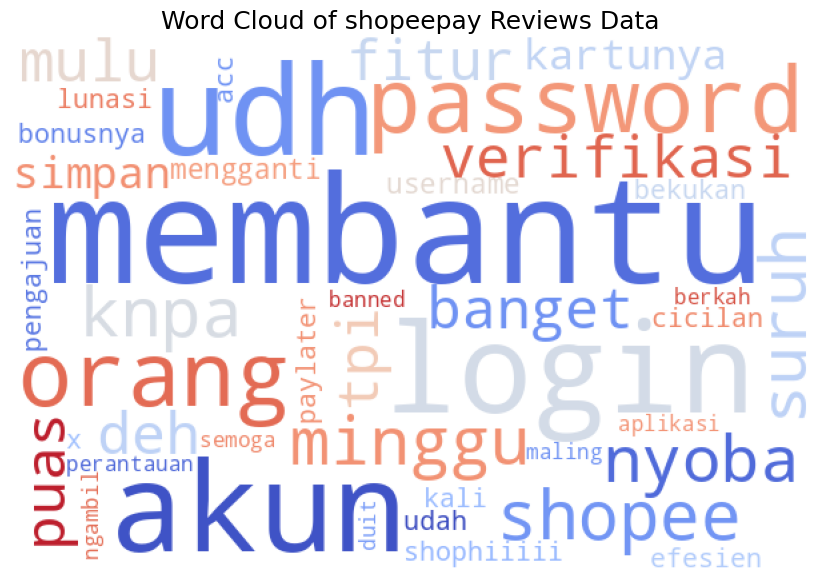

In [228]:
list_words = ''

for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10,
    colormap='coolwarm'
).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of shopeepay Reviews Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
ax.axis('off')

fig.tight_layout(pad=0)
plt.show()

In [229]:
print(negative_tweets[['text_akhir', 'polarity_score']])

                                                                                              text_akhir  \
1   shopee knpa login akun udh minggu nyoba suruh verifikasi password mulu password udh login banget deh   
2                                                                         puas tpi fitur simpan kartunya   
3                                                                                     mengganti username   
4                                                                                    membantu shophiiiii   
5                                                           efesien cicilan udah lunasi paylater bekukan   
6                                                                                               membantu   
7                                                                                               bonusnya   
8                                                                                   x pengajuan acc kali   
9                           

####Memvisualisasi: wordcloud kata positif

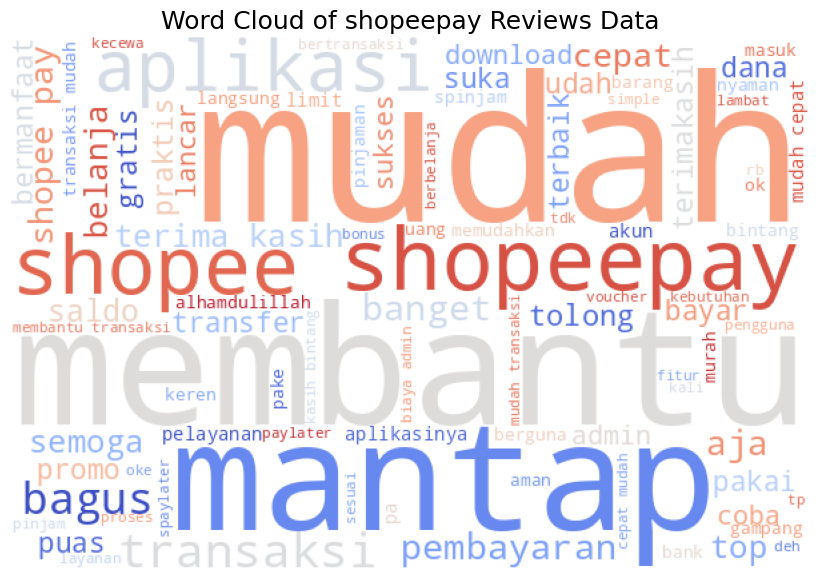

In [230]:
list_words = ''

for tweet in positive_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10,
    colormap='coolwarm'
).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of shopeepay Reviews Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
ax.axis('off')

fig.tight_layout(pad=0)
plt.show()

In [231]:
print(positive_tweets[['text_akhir', 'polarity_score']])

                                                                                                                                                                                                                                                                                                           text_akhir  \
1                                                                                     diskon semkin biaya top gratis semkain semkain hilang bonus belanja murah ongkir mkin mahal gebyar hadiah hilang tolong inovasi kebutuhan customer andai aja muncul pesaing menarik custumer hijrah terimakasih salam perubahan   
2                                                                                                                                         apps shopeepay mantap layanan terbaik zaman digital solutif modern nyaman bertransaksi apapun transfer gratis bank mudah keuangan finansial terimakasih shopeepay developer   
3                         tf shopeepay dana via va permata ba

####Memvisualisasi: Distribusi kelas kata, kata yang sering muncul, dan distribusi panjang teks

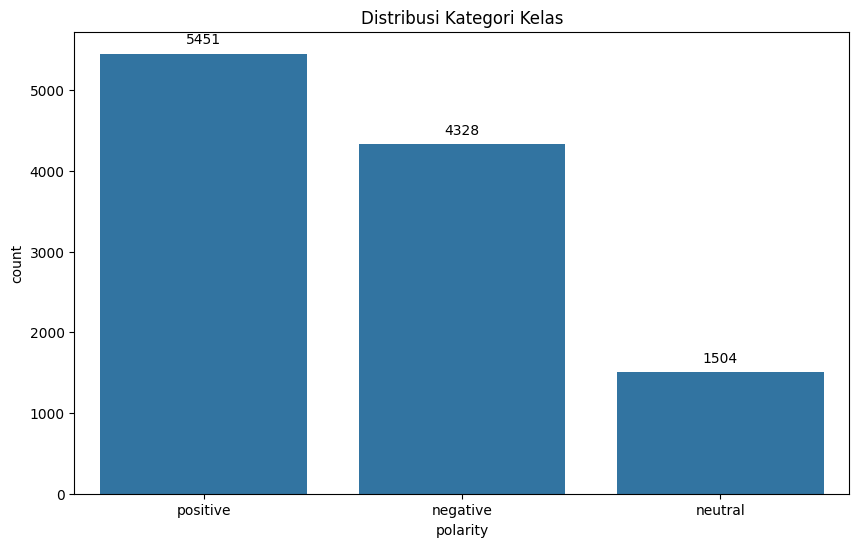

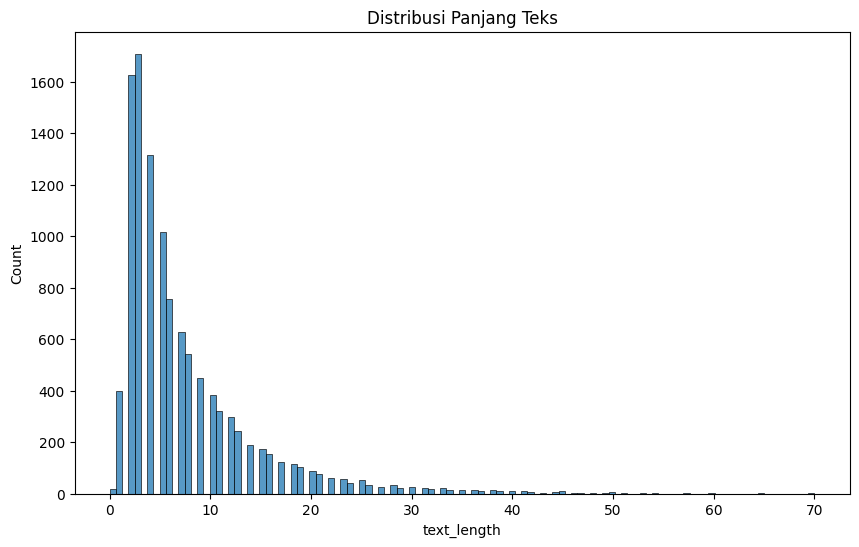

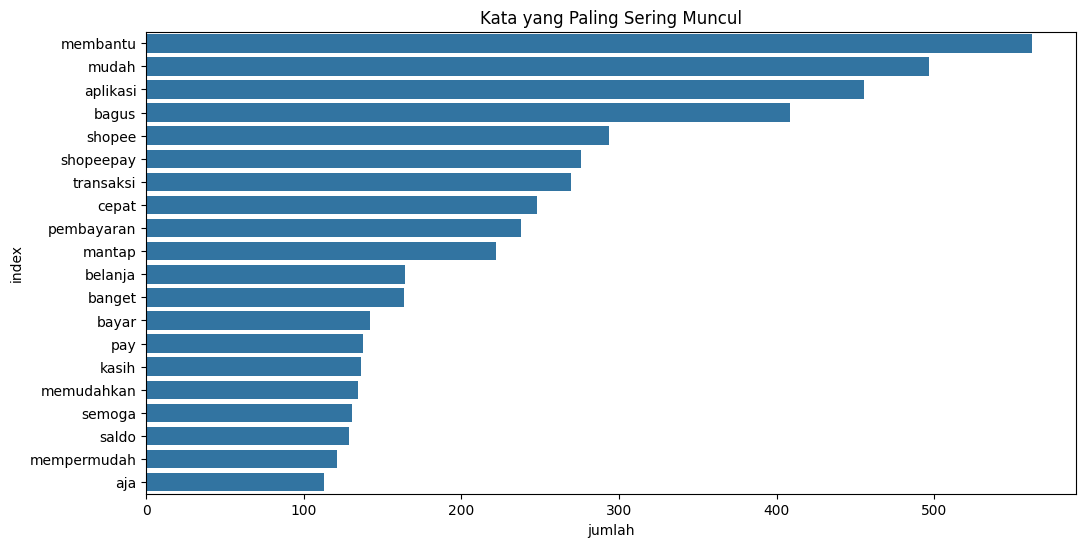

In [232]:
plt.figure(figsize=(10, 6))

class_dist_plot = sns.countplot(x='polarity', data=df)
plt.title('Distribusi Kategori Kelas')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

plt.figure(figsize=(10, 6))

df['text_length'] = df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Distribusi Panjang Teks')
plt.show()

plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata yang Paling Sering Muncul')
plt.show()

#Data Preparation

In [233]:
# Encode label
y = LabelEncoder().fit_transform(df['polarity'])
X = df['Review']

# Pisahkan data menjadi train dan test
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Data splittin

In [245]:
df_prep = df.copy()

###membagi dataframe mnejadi fitur dan label

In [246]:
X = df_prep['text_akhir']
y = df_prep['polarity']

###mengekstraksi fitur dg tf-idf

In [247]:
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

###mengkonversi hasil menjadi df_prep dan melihat hasilnya

In [248]:
df_prep = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df_prep

,acc,admin,aja,aktif,akun,alasan,alhamdulillah,aman,aneh,apapun,...,transaksi,transfer,trus,uang,udah,udh,update,utk,verifikasi,voucher
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.252765,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.205305,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.265179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.190492,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11278,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
11279,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
11280,0.557389,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
11281,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


#Pemodelan: melihat keakurasian dari data train dan data tes

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV

#Eksperimen dengan 3 Skema Pelatihan

###Skema 1: SVM dengan TF-IDF(80/20 split)

In [250]:
# Preprocessing untuk model berbasis TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_raw)
X_test_tfidf = vectorizer.transform(X_test_raw)

# Terapkan SMOTE hanya pada data pelatihan
smote = SMOTE(random_state=42)
X_train_tfidf_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Distribusi label setelah SMOTE:", Counter(y_train_smote))

Distribusi label setelah SMOTE: Counter({2: 4361, 0: 4361, 1: 4361})


In [251]:
# Eksperimen dengan 3 skema pelatihan (model)
# 1. Model SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf_smote, y_train_smote)
y_pred_svm = svm.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nEvaluasi Model SVM:")
print(f"Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm, target_names=['negatif', 'netral', 'positif']))


Evaluasi Model SVM:
Accuracy: 0.8183429330970314
              precision    recall  f1-score   support

     negatif       0.85      0.85      0.85       866
      netral       0.52      0.62      0.57       301
     positif       0.90      0.85      0.87      1090

    accuracy                           0.82      2257
   macro avg       0.76      0.77      0.76      2257
weighted avg       0.83      0.82      0.82      2257



###Skema 2: Random Forest dengan Word2Vec (80/20 split)

In [253]:
# 2. Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf_smote, y_train_smote)
y_pred_rf = rf.predict(X_test_tfidf)
# 2. Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf_smote, y_train_smote)
y_pred_rf = rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nEvaluasi Model Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf, target_names=['negatif', 'netral', 'positif']))


Evaluasi Model Random Forest:
Accuracy: 0.7749224634470536
              precision    recall  f1-score   support

     negatif       0.76      0.86      0.80       866
      netral       0.56      0.51      0.54       301
     positif       0.85      0.78      0.82      1090

    accuracy                           0.77      2257
   macro avg       0.72      0.72      0.72      2257
weighted avg       0.78      0.77      0.77      2257



###Skema 3: Deep Learning LSTM (70/30 split)

In [254]:
# Preprocessing untuk model LSTM
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_raw)

X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Konversi label ke one-hot encoding
y_train_cat = pd.get_dummies(y_train).values
y_test_cat = pd.get_dummies(y_test).values

In [255]:
# 3. Model LSTM
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    LSTM(128, return_sequences=True, kernel_regularizer='l2'),
    Dropout(0.5),
    LSTM(64, kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

history = model_lstm.fit(
    X_train_pad, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_data=(X_test_pad, y_test_cat),
    callbacks=callbacks
)

loss, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test_cat)
print("\nEvaluasi Model LSTM:")
print(f"Accuracy: {accuracy_lstm}")

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


142/142 ━━━━━━━━━━━━━━━━━━━━ 67s 417ms/step - accuracy: 0.5348 - loss: 2.6351 - val_accuracy: 0.6938 - val_loss: 0.8455 - learning_rate: 0.0010
Epoch 2/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 81s 412ms/step - accuracy: 0.7456 - loss: 0.7357 - val_accuracy: 0.7590 - val_loss: 0.6674 - learning_rate: 0.0010
Epoch 3/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 84s 428ms/step - accuracy: 0.8126 - loss: 0.5399 - val_accuracy: 0.7559 - val_loss: 0.6419 - learning_rate: 0.0010
Epoch 4/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 59s 414ms/step - accuracy: 0.8563 - loss: 0.4603 - val_accuracy: 0.8104 - val_loss: 0.6023 - learning_rate: 0.0010
Epoch 5/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 59s 413ms/step - accuracy: 0.8966 - loss: 0.3703 - val_accuracy: 0.7984 - val_loss: 0.6136 - learning_rate: 0.0010
Epoch 6/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 82s 415ms/step - accuracy: 0.8324 - loss: 0.5987 - val_accuracy: 0.7647 - val_loss: 0.7770 - learning_rate: 0.0010
Epoch 7/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 82s 415ms/step - accuracy: 0.8783 - loss:

####Visualisasi

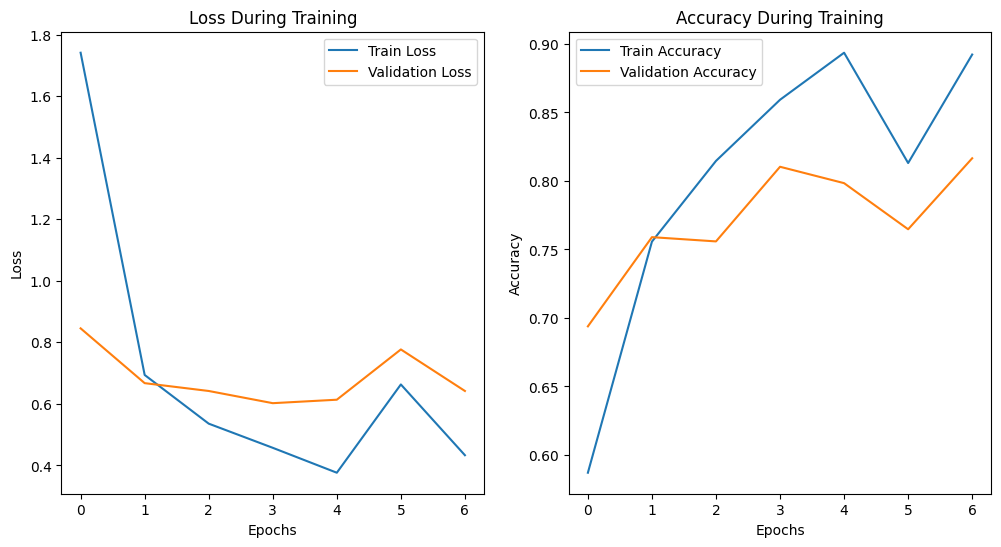

In [256]:

# Visualisasi hasil
import matplotlib.pyplot as plt

# Plot loss dan akurasi selama pelatihan
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Testing

In [257]:
# Bandingkan akurasi ketiga model
accuracies = {'SVM': accuracy_svm, 'Random Forest': accuracy_rf, 'LSTM': accuracy_lstm}

best_model_name = max(accuracies, key=accuracies.get)
print("\nModel terbaik berdasarkan akurasi:", best_model_name)


Model terbaik berdasarkan akurasi: SVM


In [258]:
# Gunakan instance LabelEncoder yang telah dilatih sebelumnya
le = LabelEncoder()
le.fit(df['polarity'])  # Pastikan LabelEncoder dilatih pada label asli di dataset

# Pilih model terbaik untuk prediksi
if best_model_name == 'SVM':
    best_model = svm
    best_predictions = y_pred_svm
elif best_model_name == 'Random Forest':
    best_model = rf
    best_predictions = y_pred_rf
else:
    best_model = model_lstm
    best_predictions = model_lstm.predict(X_test_pad).argmax(axis=1)

# Perbandingan label asli dan prediksi
comparison_df = pd.DataFrame({
    'Actual': le.inverse_transform(y_test),
    'Predicted': le.inverse_transform(best_predictions)
})
print("\nPerbandingan Label Asli dan Prediksi dengan Model Terbaik:")
print(comparison_df.head())



Perbandingan Label Asli dan Prediksi dengan Model Terbaik:
     Actual Predicted
0  negative   neutral
1  positive  positive
2  negative  negative
3  negative  negative
4  positive   neutral
